## Import libraries

In [1]:
import os
import pyxdf # xdf file importation
import matplotlib.pyplot as plt
import numpy as np
from my_functions import *
# library for creating filters
from scipy.signal import butter, iirnotch, filtfilt, welch
%matplotlib widget


In [2]:
plt.close("all")  # close all figure windows

## Initialization

### File selection and loading

In [3]:
# Define the xdf file path
FILENAME = "001_MolLud_20201112_1_c_499.txt"
# FILENAME="020_DesMar_20211129_1_c.xdf"
# path=os.path.normpath("../DAT/Input/001_MolLud_20201112_1_c.xdf")
path = os.path.normpath("DAT/OUTPUT/"+FILENAME)

In [4]:
EEG= np.loadtxt(path,dtype=float,delimiter=",")
EEG_amplitudes=EEG[:,0:8]
EEG_times=EEG[:,8]
Srate=499
N=len(EEG_amplitudes)


## Exps

### Signal centering


In [5]:
EEG_amplitudes_centered=EEG_amplitudes-np.mean(EEG_amplitudes,axis=0)

### Electrode selection

In [6]:
#Electrode selection [1;8]
i = 1  # electrode number
electrodei = EEG_amplitudes_centered[:, i-1]
print("electrode",str(i),"shape:",electrodei.shape)

electrode 1 shape: (221938,)


### Compute FFT

In [7]:
EEG_amplitudes_centered_FFT = compute_fft_on_all_channels(EEG_amplitudes_centered, Srate)
print(type(EEG_amplitudes_centered_FFT),"length:",len(EEG_amplitudes_centered_FFT))

<class 'dict'> length: 2


### Graph FFT centered signal electrode i

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


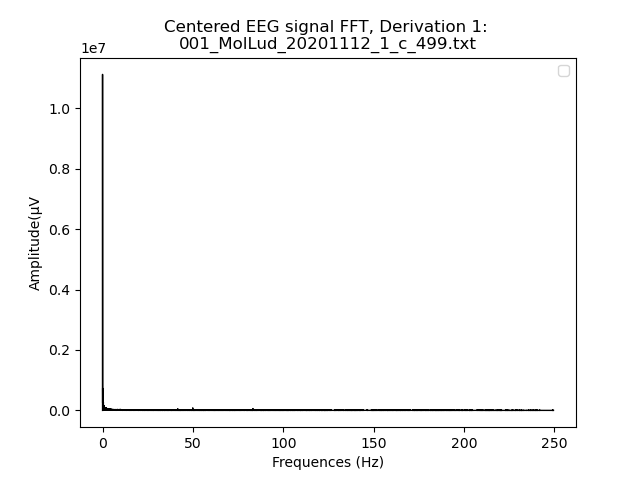

In [8]:
# plotting electrode i-1's centered signal FFT for verification
single_plot(FILENAME, fig_number=1, x=EEG_amplitudes_centered_FFT["fft_frequencies"], y=EEG_amplitudes_centered_FFT["FFT_Results_EEG_channels"][:,i],
            fig_title="Centered EEG signal FFT, Derivation " +
            str(i)+": ",
            xlabel="Frequences (Hz)", ylabel="Amplitude(µV")

### Compute PSD: FFT estimator

In [9]:
PSD_from_fft= (abs(EEG_amplitudes_centered_FFT["FFT_Results_EEG_channels"])**2)/N*Srate

### Graph PSD from FFT's centered signal electrode i

In [10]:
# plotting electrode i-1's centered signal FFT for verification
single_plot(FILENAME, fig_number=1, x=EEG_amplitudes_centered_FFT["fft_frequencies"], y=PSD_from_fft[:,i],
            fig_title="DSP from FFT, Derivation " + str(i)+": ",
            xlabel="Frequences (Hz)", ylabel="Amplitude(µV²/Hz")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


### Compute PSD:welch

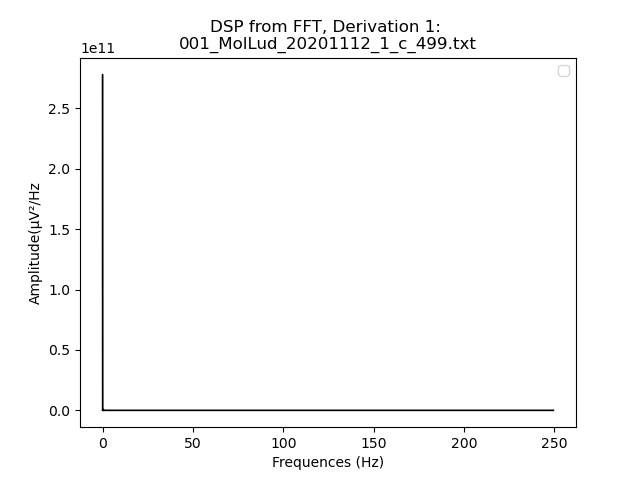

In [11]:
plt.show()